In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn import linear_model
from sklearn import metrics

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import classification_report
#from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import f1_score as f1
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score 
import scipy.stats as stats
     

In [2]:

!pip install category_encoders
from category_encoders.ordinal import OrdinalEncoder
from category_encoders.one_hot import OneHotEncoder
from category_encoders.target_encoder import TargetEncoder

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:

df = pd.read_csv('/content/df2.csv', delimiter = ',')
df=df.drop("class",axis=1)
df.head()

,Make,Model,Style,Distance,Engine_capacity(cm3),Fuel_type,Transmission,Price(euro),Age,km_year,prestige
0,Toyota,Prius,Hatchback,195000.0,1800.0,Hybrid,Automatic,7750.0,11,17727.272727,2
1,Renault,Grand Scenic,Universal,135000.0,1500.0,Diesel,Manual,8550.0,8,16875.000000,2
2,Renault,Laguna,Universal,110000.0,1500.0,Diesel,Manual,6550.0,10,11000.000000,3
3,Opel,Astra,Universal,200000.0,1600.0,Metan/Propan,Manual,4100.0,16,12500.000000,3
4,Mercedes,Vito,Microvan,300000.0,2200.0,Diesel,Manual,3490.0,22,13636.363636,4


In [4]:

X = df.drop('Price(euro)', axis=1)
y = df["Price(euro)"] 


In [5]:
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

In [6]:
display(categorical_features)
display(numerical_features)

['Make', 'Model', 'Style', 'Fuel_type', 'Transmission']

['Distance', 'Engine_capacity(cm3)', 'Age', 'km_year', 'prestige']

In [7]:
numerical_transformer = Pipeline([('scaler',StandardScaler())])

ct = ColumnTransformer([('num_transformer', numerical_transformer, numerical_features),
                          ('encoder', OrdinalEncoder(), categorical_features)
                         ])
  # Main pipeline for fitting.
pipeline = Pipeline([('column_transformer', ct)])

In [8]:
pipe_ful_for_pca = Pipeline([
    ('one_hot_encoder_', OrdinalEncoder(cols=categorical_features)),
    #('scaler_', CustomScaler(list(num_cols))),
    ('scaler_', StandardScaler()),
    ])

In [9]:
def fit_lineer_regersion(X, y, print_output=True):

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

  X_train=pipeline.fit_transform(X_train)
  X_test=pipeline.transform(X_test)

  regr = LinearRegression()
  regr.fit(X_train, y_train)

  y_preds = regr.predict(X_test)
  R2=r2_score(y_test, y_preds)
    
  return R2

In [10]:
fit_lineer_regersion(X,y)

0.5889841541981506

In [11]:
numerical_transformer = Pipeline([('poly_features', PolynomialFeatures(degree=2)),
                                  ('scaler',StandardScaler()) ])
categorical_transformer = Pipeline(steps=[ ('onehot', OrdinalEncoder(handle_unknown='ignore'))])

preprocessor_pipeline = ColumnTransformer(transformers=[
    ('num', numerical_transformer, numerical_features),
    ('cat', categorical_transformer, categorical_features)
])


In [12]:
def Polynom_lineer_regersion(X, y, print_output=True):

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

  X_train=preprocessor_pipeline.fit_transform(X_train)
  X_test=preprocessor_pipeline.transform(X_test)

  regr = LinearRegression()
  regr.fit(X_train, y_train)

  y_preds = regr.predict(X_test)
  R2=r2_score(y_test, y_preds)
    
  return R2

In [13]:
Polynom_lineer_regersion(X,y)

0.7458317695804152

In [14]:
X.shape

(32074, 10)

In [15]:
transformed=pipe_ful_for_pca.fit_transform(X)


In [16]:
transformed.shape

(32074, 10)

In [17]:
pca=PCA(n_components=10)
pca.fit(transformed)

PCA(n_components=10)

In [18]:
pca.explained_variance_ratio_.cumsum()

array([0.2664222 , 0.43265486, 0.56563247, 0.67045264, 0.76432944,
       0.84670663, 0.92272674, 0.96603999, 0.98844161, 1.        ])

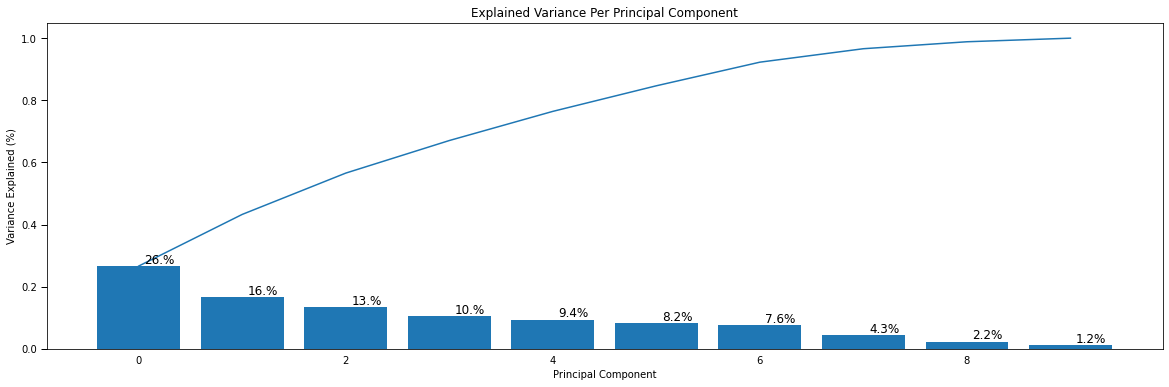

In [19]:
def scree_plot(pca):
    num_components = len(pca.explained_variance_ratio_)
    ind = np.arange(num_components)
    vals = pca.explained_variance_ratio_
 
    plt.figure(figsize=(20, 6))
    ax = plt.subplot(111)
    cumvals = np.cumsum(vals)
    ax.bar(ind, vals)
    ax.plot(ind, cumvals)
    for i in range(num_components):
        ax.annotate(r"%s%%" % ((str(round(vals[i]*100,1))[:3])), (ind[i]+0.2, vals[i]), 
                    va="bottom", 
                    ha="center", 
                    fontsize=12)
 
    ax.xaxis.set_tick_params(width=0)
    ax.yaxis.set_tick_params(width=1, length=6)
 
    ax.set_xlabel("Principal Component")
    ax.set_ylabel("Variance Explained (%)")
    plt.title('Explained Variance Per Principal Component')
scree_plot(pca)

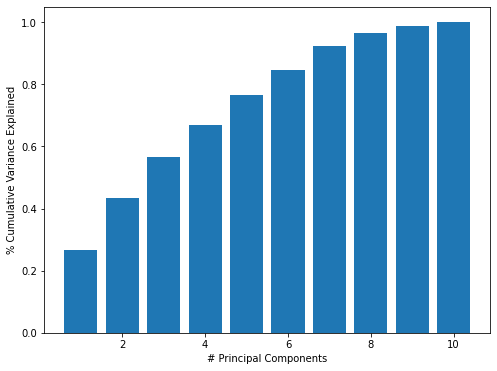

In [20]:
cum_exp_var = []
var_exp = 0
for i in pca.explained_variance_ratio_:
    var_exp += i
    cum_exp_var.append(var_exp)

# Plot cumulative explained variance for all PCs

fig, ax = plt.subplots(figsize=(8,6))
ax.bar(range(1,11), cum_exp_var)
ax.set_xlabel('# Principal Components')
ax.set_ylabel('% Cumulative Variance Explained');

In [21]:
#Selecting the Right Number of Dimensions
def get_pca_components(pca, var):
    cumm_var = pca.explained_variance_ratio_
    total_var = 0.
    N_COMPONENTS = 0
    for i in cumm_var:
        N_COMPONENTS += 1
        total_var += i
        if total_var >= var:
            break
    return N_COMPONENTS

In [22]:
n_components = get_pca_components(pca, 0.95)
n_components

8

In [23]:
pca = PCA(n_components=n_components)
X_d = pca.fit_transform(transformed)

In [24]:
X_d.shape

(32074, 8)

In [25]:
pca.explained_variance_ratio_

array([0.2664222 , 0.16623266, 0.13297761, 0.10482018, 0.09387679,
       0.08237719, 0.07602011, 0.04331326])

In [26]:
 
pca_df = pd.DataFrame(
    data=X_d, 
    columns=['PC1', 'PC2','PC3','PC4','PC5','PC6','PC7','PC8'])
pca_df['target'] = y
pca_df['target'] = pca_df['target']
 
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,target
0,-0.973548,1.317095,-0.636101,-1.980815,0.218629,-0.264709,-0.993161,0.786565,7750.0
1,-0.178254,0.519045,-1.493168,-1.475158,0.431198,0.626769,-0.199949,-0.710062,8550.0
2,0.620259,-0.017413,-1.181261,-1.593801,0.828765,0.659718,-0.493105,-0.406614,6550.0
3,1.326404,0.384800,-0.574220,-1.269083,0.158589,0.024061,0.194956,-0.444906,4100.0
4,1.933474,1.689995,0.734189,-0.823845,0.168727,0.111581,-0.603680,-0.265000,3490.0
...,...,...,...,...,...,...,...,...,...
32069,-1.169534,-1.091586,-0.125791,-1.236461,-0.451587,0.156345,1.213804,0.230461,11500.0
32070,1.218488,-0.508301,0.644972,1.905164,-0.584737,0.757221,-0.400188,-0.066924,4400.0
32071,-0.490132,-0.862406,-1.739946,1.194683,1.297859,-0.535587,-1.107328,-0.626156,7000.0
32072,0.467583,1.972302,1.095938,1.788049,-1.446667,2.138161,0.096732,-0.039726,4000.0


/usr/local/lib/python3.8/dist-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


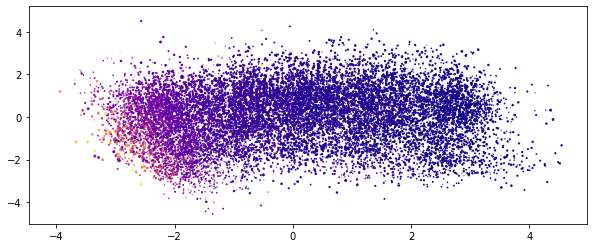

In [27]:

plt.figure(figsize=(10,4))
plt.scatter(X_d[:,0],X_d[:,1],X_d[:,2],c=pca_df['target'],cmap="plasma")


In [28]:
# Principal components correlation coefficients
loadings = pca.components_
 
# Number of features before PCA
n_features = pca.n_features_
 
# Feature names before PCA
feature_names = X.columns
 
# PC names
pc_list = [f'PC{i}' for i in list(range(1, n_features + 1))]
 
# Match PC names to loadings
pc_loadings = dict(zip(pc_list, loadings))
 
# Matrix of corr coefs between feature names and PCs
loadings_df = pd.DataFrame.from_dict(pc_loadings)
loadings_df['feature_names'] = feature_names
loadings_df = loadings_df.set_index('feature_names')
loadings_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
feature_names,,,,,,,,
Make,0.053987,-0.315017,-0.078848,0.496508,-0.638518,0.076499,-0.474646,0.043086
Model,-0.127903,-0.080212,-0.044256,0.696555,0.521744,-0.465922,0.000605,0.012205
Style,-0.171136,-0.045969,0.452647,0.390344,0.069139,0.673896,0.361655,0.128012
Distance,0.199781,0.633556,0.171852,0.194193,-0.248987,-0.184000,0.126873,0.094411
Engine_capacity(cm3),-0.227150,0.061771,0.674686,-0.076210,-0.073211,-0.229177,-0.280722,-0.531964
Fuel_type,0.196779,-0.408929,0.056623,0.030569,-0.352521,-0.344521,0.706573,-0.207162
Transmission,0.436828,0.094139,-0.253123,0.176809,0.171953,0.328609,-0.013342,-0.741875
Age,0.496856,0.081340,0.402679,0.004584,0.038289,-0.095167,-0.054382,0.196417
km_year,-0.279443,0.547291,-0.267421,0.187124,-0.296244,-0.028553,0.192707,-0.096128


In [29]:
pca.components_.shape

(8, 10)

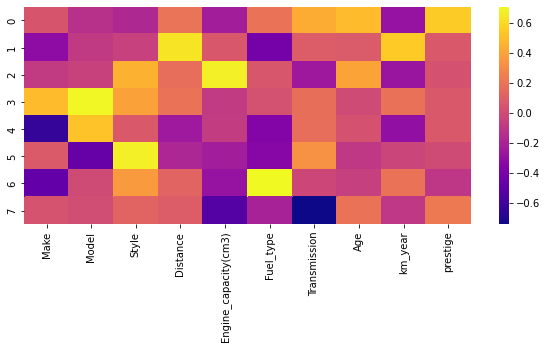

In [30]:
pca_data=pd.DataFrame(pca.components_,columns=feature_names)
plt.figure(figsize=(10,4))
sns.heatmap(pca_data,cmap='plasma')

In [31]:
def lineer_regersion(X, y, print_output=True):
  

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

  X_train=pipeline.fit_transform(X_train)
  X_test=pipeline.transform(X_test)

  pca = PCA(n_components=8)
  pc_X_train = pca.fit_transform(X_train)
  pc_X_test = pca.transform(X_test)

  regr = LinearRegression()
  regr.fit(pc_X_train, y_train)

  y_preds = regr.predict(pc_X_test)
  R2=r2_score(y_test, y_preds)
    
  return R2

In [32]:
lineer_regersion(X,y)

0.5869953543179595

In [33]:
import warnings
warnings.filterwarnings('ignore')

In [34]:

from sklearn.model_selection import cross_validate
n_components = 2
pipe_pca = Pipeline([
    ('cat_encoder_', OrdinalEncoder(cols=categorical_features)),
    ('poly_featurizer_', PolynomialFeatures(degree=1)),
     ('scaler_', StandardScaler()),
    ('selector_', PCA(n_components=n_components)), 
    ('model_', LinearRegression() )])

cv_res5 = cross_validate(pipe_pca, X, y, cv=5, scoring='r2', return_train_score=True)
cv_res5

{'fit_time': array([0.36956549, 0.3499794 , 0.40620875, 0.54915667, 0.63775992]),
 'score_time': array([0.07895255, 0.08432841, 0.09717059, 0.16837549, 0.09396982]),
 'test_score': array([0.57405383, 0.49395271, 0.53282743, 0.49912256, 0.52459527]),
 'train_score': array([0.52819348, 0.53802818, 0.53281677, 0.53796063, 0.53173387])}

In [35]:
cv_res5['test_score'].mean()

0.5249103577367575

Для простых моделей тренировочная и валидационная ошибка находятся где-то рядом, и они велики. Это говорит о том, что модель недообучилась: то есть она не имеет достаточное кол-во параметров.

 для небольшого объема данных ошибки на обучающей выборке и в процессе кросс-валидации довольно сильно отличаются, что указывает на переобучение. Для той же модели, но с большим объемом данных ошибки "сходятся", что указывается на недообучение.

In [36]:
numerical_transformer = Pipeline([('poly_features', PolynomialFeatures(degree=2)),
                                  ('scaler',StandardScaler()) ])
categorical_transformer = Pipeline(steps=[ ('onehot', OrdinalEncoder(handle_unknown='ignore'))])

preprocessor_pipeline = ColumnTransformer(transformers=[
    ('num', numerical_transformer, numerical_features),
    ('cat', categorical_transformer, categorical_features)
])


In [37]:
def Polynom_regersion(X, y,n_components,print_output=True):

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

  pca = PCA(n_components=n_components)

  X_train=preprocessor_pipeline.fit_transform(X_train)
  X_test=preprocessor_pipeline.transform(X_test)

  pc_X_train = pca.fit_transform(X_train)
  pc_X_test = pca.transform(X_test)

  regr = LinearRegression()
  regr.fit(pc_X_train, y_train)

  y_preds = regr.predict(pc_X_test)
  R2=r2_score(y_test, y_preds)
    
  return R2

In [38]:
numerical_transformer = Pipeline([('poly_featurizer_', PolynomialFeatures(degree=2))])

ct = ColumnTransformer([('num_transformer', numerical_transformer, numerical_features),
                          ('encoder', OrdinalEncoder(), categorical_features)
                         ])
pipe_ful_for_pca=Pipeline([('column_transformer', ct),
                   ('scaler_', StandardScaler())])

In [39]:
X_new=pipe_ful_for_pca.fit_transform(X)
X_new.shape

(32074, 26)

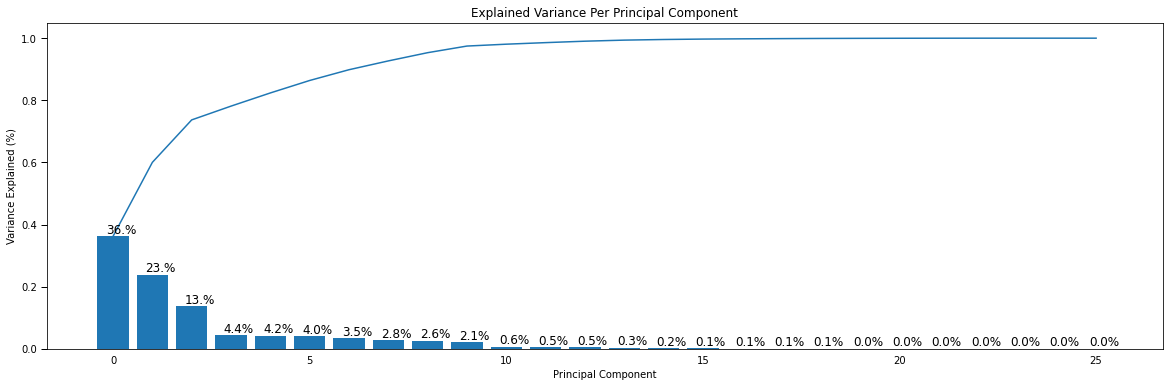

In [40]:

pca=PCA(n_components=26)
pca.fit(X_new)
scree_plot(pca)

In [41]:

n_components = get_pca_components(pca, 0.95)
n_components

9

In [42]:
Polynom_regersion(X,y,n_components)

0.5487226561071527

In [43]:
n_components = 9
pipe_pca = Pipeline([('column_transformer', ct),
                     ('selector_', PCA(n_components=n_components)),
                     ('linear_regression', LinearRegression() ) 
     ])

cv_res5 = cross_validate(pipe_pca, X, y, cv=5, scoring='r2', return_train_score=True)
cv_res5

{'fit_time': array([0.69343209, 0.68324995, 0.63826823, 0.78329682, 0.54776788]),
 'score_time': array([0.1216507 , 0.09171963, 0.09632707, 0.10333896, 0.05717373]),
 'test_score': array([0.69975743, 0.59379216, 0.59989324, 0.60136052, 0.61569097]),
 'train_score': array([0.61709595, 0.63967151, 0.64050549, 0.63857114, 0.63459634])}

In [44]:
cv_res5['test_score'].mean()

0.6220988629213935

In [45]:

n_component = [2,4,6,9,12,15,18]

r2_score1=[]
r2_score2=[]
for num in n_component:
  degree=num
  pipe_pca = Pipeline([('column_transformer', ct),
                     ('selector_', PCA(n_components=degree)),
                     ('linear_regression', LinearRegression() ) 
     ])
  cv_res5 = cross_validate(pipe_pca, X, y, cv=5, scoring='r2', return_train_score=True)
  r2_score1.append(cv_res5["test_score"].mean())
  r2_score2.append(cv_res5["train_score"].mean())

In [46]:
r2_score1

[0.11999027540042233,
 0.16856907736367882,
 0.5779285612781828,
 0.622098862921389,
 0.6719555579361944,
 0.7139528285643092,
 0.715829942929054]

In [47]:
r2_score2

[0.14550398381375754,
 0.1948188534643958,
 0.5909048614398176,
 0.6340880862670074,
 0.6830935095483686,
 0.7231339641763587,
 0.7251604928901726]

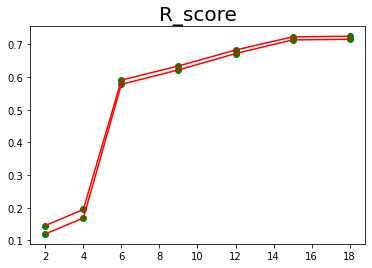

In [48]:
plt.scatter(n_component,r2_score1, color="green")
plt.scatter(n_component,r2_score2, color="green")
plt.plot(n_component,r2_score1, color="red") 
plt.plot(n_component,r2_score2, color="red")
plt.title('R_score',fontsize=20)
plt.show()
     

In [49]:
n_components=16

In [50]:
Polynom_regersion(X, y,n_components)

0.7367757183393366

In [51]:
numerical_transformer = Pipeline([('poly_featurizer_', PolynomialFeatures(degree=4))])

ct = ColumnTransformer([('num_transformer', numerical_transformer, numerical_features),
                          ('encoder', OrdinalEncoder(), categorical_features)
                         ])
pipe_ful_for_pca=Pipeline([('column_transformer', ct),
                   ('scaler_', StandardScaler())])

In [52]:
numerical_transformer = Pipeline([('poly_featurizer_', PolynomialFeatures(degree=4)),
                                   ('scaler_', StandardScaler())])

ct = ColumnTransformer([('num_transformer', numerical_transformer, numerical_features),
                          ('encoder', OrdinalEncoder(), categorical_features)
                         ])
pipeline=Pipeline([('column_transformer', ct)])

In [53]:
def Polynom_regersion1(X, y, n,print_output=True):

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

  pca = PCA(n_components=n)

  X_train=pipeline.fit_transform(X_train)
  X_test=pipeline.transform(X_test)

  pc_X_train = pca.fit_transform(X_train)
  pc_X_test = pca.transform(X_test)

  regr = LinearRegression()
  regr.fit(pc_X_train, y_train)

  y_preds = regr.predict(pc_X_test)
  R2=r2_score(y_test, y_preds)
    
  return R2

In [54]:

X_new=pipe_ful_for_pca.fit_transform(X)
display(X_new.shape)


(32074, 131)

<Figure size 1440x720 with 0 Axes>

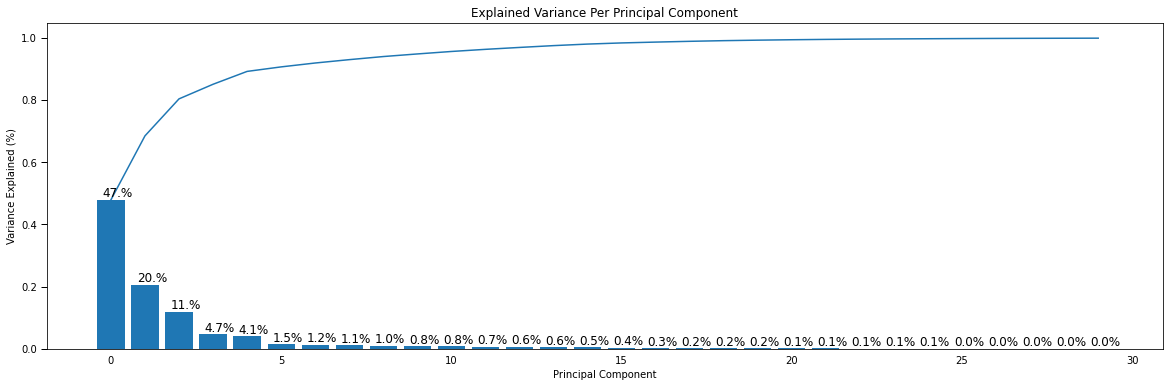

In [55]:

pca=PCA(n_components=30)
pca.fit(X_new)
plt.figure(figsize=(20,10))
scree_plot(pca)

In [56]:
n_components = get_pca_components(pca, 0.95)
n_components

11

In [57]:
Polynom_regersion1(X,y,11)

0.5603948704648638

In [58]:

n_component = [16,18,23,27,30,35,40,45,50,55,60]

r2_score1=[]
r2_score2=[]
for num in n_component:
  degree=num
  pipe_pca = Pipeline([('column_transformer', ct),
                     ('selector_', PCA(n_components=degree)),
                     ('linear_regression', LinearRegression() ) 
     ])
  cv_res5 = cross_validate(pipe_pca, X, y, cv=5, scoring='r2', return_train_score=True)
  r2_score1.append(cv_res5["test_score"].mean())
  r2_score2.append(cv_res5["train_score"].mean())

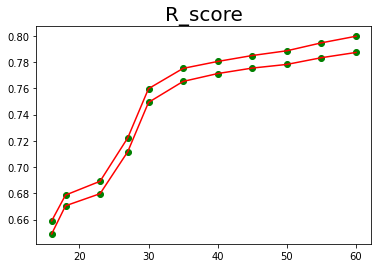

In [59]:
plt.scatter(n_component,r2_score1, color="green")
plt.scatter(n_component,r2_score2, color="green")
plt.plot(n_component,r2_score1, color="red") 
plt.plot(n_component,r2_score2, color="red")
plt.title('R_score',fontsize=20)
plt.show()
     

In [60]:
Polynom_regersion1(X,y,60)

0.8072837374437611

In [61]:
X2=pipeline.fit_transform(X)
X2=pd.DataFrame(X2)
def do_pca(n_components,X):
  pca=PCA(n_components)
  X_pca=pca.fit_transform(X2)
  return pca,X_pca


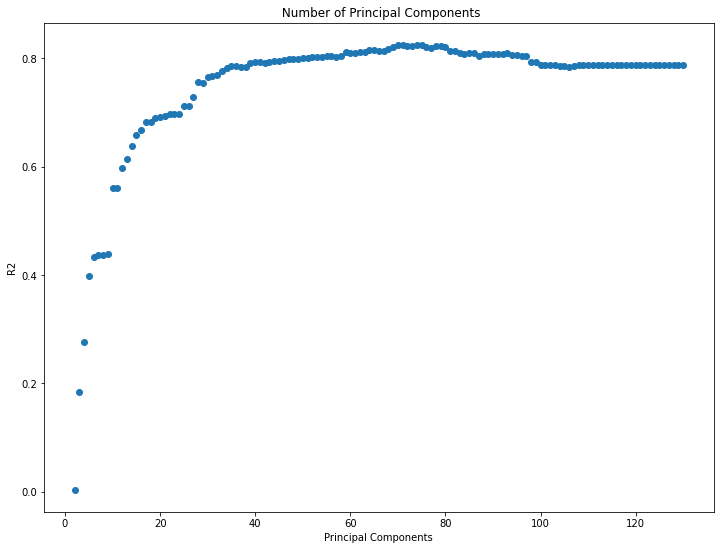

In [62]:
def fit_L_R(X, y, print_output=True):
    X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                        test_size=0.2, 
                                                        random_state=42)

    clf =LinearRegression()
    clf.fit(X_train, y_train)

    y_preds = clf.predict(X_test)

    R2=r2_score(y_test, y_preds)
    
    return R2

   
acc_list, pc_list = [], []
for pc in range(2,X2.shape[1]):
    pca, X_pca = do_pca(pc,X2)
    acc = fit_L_R(X_pca,y)
    acc_list.append(acc)
    pc_list.append(pc)

plt.figure(figsize=[12,9])
plt.scatter(pc_list, acc_list)
plt.title(' Number of Principal Components')
plt.xlabel('Principal Components')
plt.ylabel('R2');


In [63]:
numerical_transformer = Pipeline([('poly_features', PolynomialFeatures(degree=2)),
                                  ('scaler',StandardScaler()) ])
categorical_transformer = Pipeline(steps=[ ('onehot', OrdinalEncoder(handle_unknown='ignore'))])

preprocessor_pipeline = ColumnTransformer(transformers=[
    ('num', numerical_transformer, numerical_features),
    ('cat', categorical_transformer, categorical_features)
])

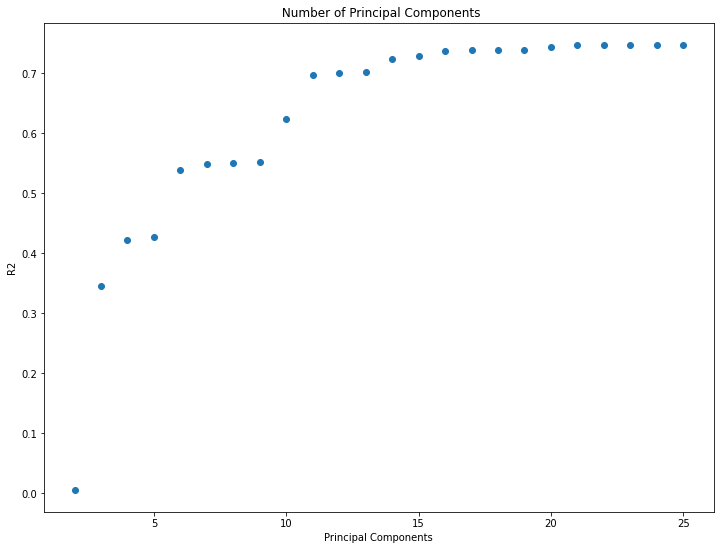

In [64]:
X2=preprocessor_pipeline.fit_transform(X)
X2=pd.DataFrame(X2)
   
acc_list, pc_list = [], []
for pc in range(2,X2.shape[1]):
    pca, X_pca = do_pca(pc,X2)
    acc = fit_L_R(X_pca,y)
    acc_list.append(acc)
    pc_list.append(pc)

plt.figure(figsize=[12,9])
plt.scatter(pc_list, acc_list)
plt.title(' Number of Principal Components')
plt.xlabel('Principal Components')
plt.ylabel('R2');

In [65]:
X2.shape[1]

26

In [66]:
numerical_transformer = Pipeline([('poly_features', PolynomialFeatures(degree=1)),
                                  ('scaler',StandardScaler()) ])
categorical_transformer = Pipeline(steps=[ ('onehot', OrdinalEncoder(handle_unknown='ignore'))])

preprocessor_pipeline = ColumnTransformer(transformers=[
    ('num', numerical_transformer, numerical_features),
    ('cat', categorical_transformer, categorical_features)
])

In [67]:
X2=preprocessor_pipeline.fit_transform(X)
X2=pd.DataFrame(X2)
X2.shape

(32074, 11)

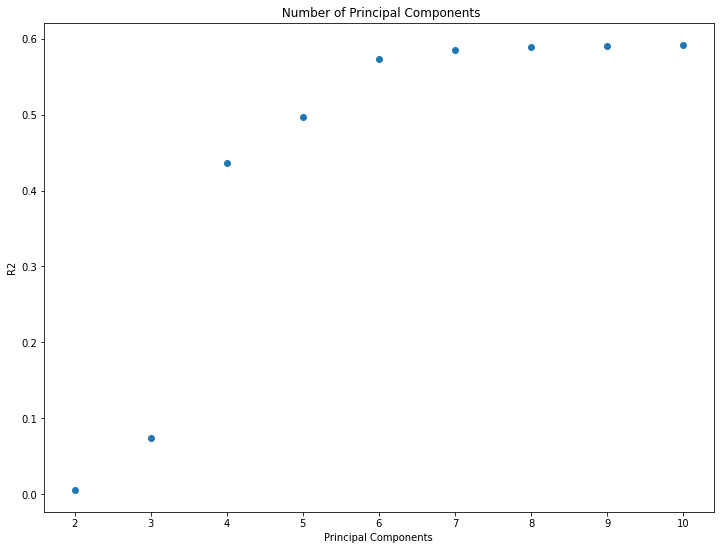

In [73]:
acc_list=[]
pc_list = []
for pc in range(2,X2.shape[1]):
  pca, X_pca = do_pca(pc,X2)
  acc = fit_L_R(X_pca,y)
  acc_list.append(acc)
  pc_list.append(pc)

plt.figure(figsize=[12,9])
plt.scatter(pc_list, acc_list)
plt.title(' Number of Principal Components')
plt.xlabel('Principal Components')
plt.ylabel('R2');

In [74]:

df1 = pd.read_csv('/content/df2_cat.csv', delimiter = ',')
df1.head()

,Make,Model,Style,Distance,Engine_capacity(cm3),Fuel_type,Transmission,Price(euro),Age,km_year,class,prestige
0,40,82,4,195000.0,1800.0,2,1,7750.0,11,17727.272727,4,2
1,32,52,11,135000.0,1500.0,0,0,8550.0,8,16875.000000,4,2
2,32,61,11,110000.0,1500.0,0,0,6550.0,10,11000.000000,3,3
3,28,13,11,200000.0,1600.0,3,0,4100.0,16,12500.000000,3,3
4,23,116,5,300000.0,2200.0,0,0,3490.0,22,13636.363636,3,4


In [75]:
df1=df1.drop("Age",axis=1)
df1=df1.drop("class",axis=1)
df1.head()

,Make,Model,Style,Distance,Engine_capacity(cm3),Fuel_type,Transmission,Price(euro),km_year,prestige
0,40,82,4,195000.0,1800.0,2,1,7750.0,17727.272727,2
1,32,52,11,135000.0,1500.0,0,0,8550.0,16875.000000,2
2,32,61,11,110000.0,1500.0,0,0,6550.0,11000.000000,3
3,28,13,11,200000.0,1600.0,3,0,4100.0,12500.000000,3
4,23,116,5,300000.0,2200.0,0,0,3490.0,13636.363636,4


In [76]:
target = 'Price(euro)'
X = df1.drop(target,axis=1)
y = df1[target]

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape

(25659, 9)

In [78]:
scale=StandardScaler()

In [79]:
# Run standardization on X variables
X_train_scaled, X_test_scaled = scale.fit_transform(X_train), scale.transform(X_test)
X_train_scaled

array([[ 0.28276997, -1.46913464, -1.10201852, ..., -0.9219349 ,
        -2.02618918,  1.33092433],
       [ 0.35504044,  0.7445568 ,  0.76178488, ..., -0.9219349 ,
        -0.90230544,  1.33092433],
       [ 0.57185188,  0.14856295,  1.07241878, ..., -0.9219349 ,
        -0.01167168,  0.4407388 ],
       ...,
       [-0.07858242, -1.24208937,  0.76178488, ..., -0.9219349 ,
         0.40700897,  0.4407388 ],
       [ 0.71639283,  0.7445568 , -0.48075072, ..., -0.9219349 ,
         0.44791818,  0.4407388 ],
       [-0.07858242,  0.7445568 ,  0.76178488, ..., -0.9219349 ,
        -1.02527263,  1.33092433]])

In [80]:
X_test_scaled

array([[-0.07858242, -0.75961816,  0.76178488, ...,  1.08467529,
        -0.57606597,  1.33092433],
       [ 0.57185188, -0.10686299, -1.10201852, ..., -0.9219349 ,
        -0.15845117, -0.44944672],
       [-0.72901671,  0.12018229,  1.07241878, ..., -0.9219349 ,
        -0.33595372,  1.33092433],
       ...,
       [ 0.78866331,  0.29046624,  1.07241878, ..., -0.9219349 ,
         0.09680295,  0.4407388 ],
       [-0.07858242,  0.82969877,  0.76178488, ...,  1.08467529,
        -0.15847944,  0.4407388 ],
       [ 0.4995814 ,  0.7445568 ,  0.76178488, ...,  1.08467529,
        -0.71779631,  1.33092433]])

In [81]:
# Define cross-validation folds
from sklearn.model_selection import KFold ,cross_val_score
cv = KFold(n_splits=5, shuffle=True, random_state=42)

In [82]:
lin_reg = LinearRegression().fit(X_train_scaled, y_train)

In [83]:
# Get R2 score
lin_reg.score(X_train_scaled, y_train)

0.5908776525631723

как выше видели

In [84]:
lr_scores =  cross_val_score(lin_reg, 
                                 X, 
                                 y, 
                                 cv=cv, 
                                 scoring='r2')
lr_scores

array([0.58417106, 0.58610268, 0.60052996, 0.58068101, 0.5945795 ])

In [85]:
lr_score_train = np.mean(lr_scores)
lr_score_train

0.5892128414833423

In [86]:
y_predicted = lin_reg.predict(X_test_scaled)
lr_score_test = r2_score(y_test, y_predicted) 
lr_score_test

0.5841710601589348

Principal Component Regression 

In [87]:
lin_reg = LinearRegression()
r2_score_list = []

In [88]:
X4=scale.fit_transform(X)

In [89]:
# First generate all the principal components
pca = PCA()
X_train_pc = pca.fit_transform(X4)
#X_train_pc = pca.fit_transform(X_train_scaled)
X_train_pc.shape

(32074, 9)

In [90]:
# View explained variance ratio for each principal component
pca.explained_variance_ratio_

array([0.22812782, 0.18609058, 0.14919482, 0.10519336, 0.10227106,
       0.09028775, 0.07497551, 0.04439922, 0.01945988])

In [91]:
pca.explained_variance_ratio_.cumsum()

array([0.22812782, 0.4142184 , 0.56341322, 0.66860658, 0.77087765,
       0.86116539, 0.93614091, 0.98054012, 1.        ])

In [92]:
n_components = get_pca_components(pca, 0.95)
n_components

8

<Figure size 1440x720 with 0 Axes>

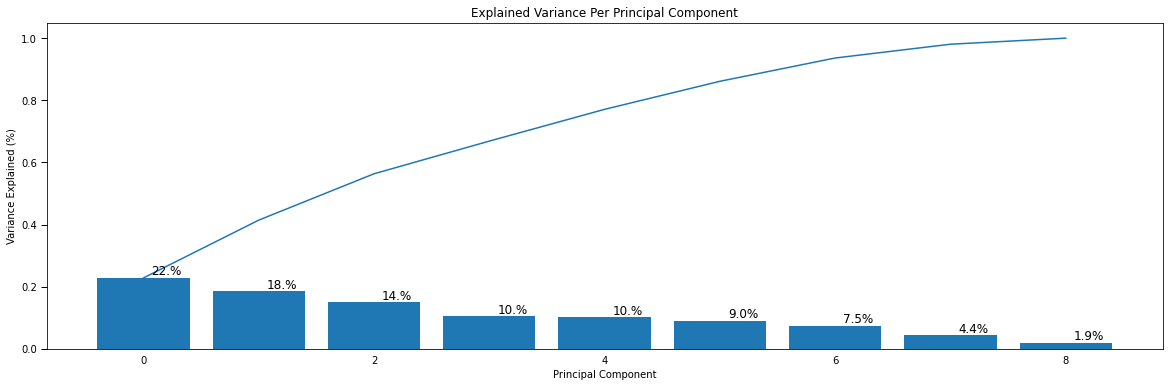

In [93]:
plt.figure(figsize=(20,10))
scree_plot(pca)

In [94]:
 #X.iloc[:,0:i]

In [95]:
# Loop through different count of principal components for linear regression
for i in range(1, X.shape[1]+1):
  r2_score =  cross_val_score(lin_reg, 
                              X.iloc[:,0:i], # Use first k principal components
                              y, 
                              cv=cv, 
                              scoring='r2').mean()
  r2_score_list.append(r2_score)

In [96]:
r2_score_list

[0.01438531777644858,
 0.022830477763548806,
 0.025152571995474427,
 0.14623146118549674,
 0.3007645937830101,
 0.3140253260544485,
 0.39313570221929944,
 0.4740134973620903,
 0.5892128414833423]

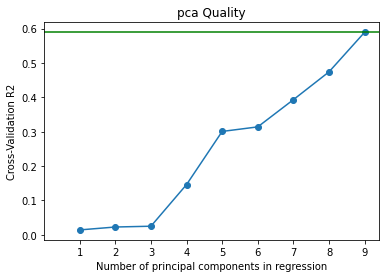

In [97]:
# Plot RMSE vs count of principal components used
plt.plot(r2_score_list, '-o')
plt.xlabel('Number of principal components in regression')
plt.ylabel('Cross-Validation R2')
plt.title('pca Quality')
plt.xlim(xmin=-1);
plt.xticks(np.arange(X_train_pc.shape[1]), np.arange(1, X_train_pc.shape[1]+1))
plt.axhline(y=lr_score_train, color='g', linestyle='-');

In [98]:
# Visually determine optimal number of principal components
best_pc_num = 8

In [100]:
# Train model on training set
pca = PCA()
X_train_pc = pca.fit_transform(X_train_scaled)
lin_reg_pc = LinearRegression().fit(X_train_pc[:,:best_pc_num], y_train)

In [101]:
# Get R2 score
lin_reg_pc.score(X_train_pc[:,:best_pc_num], y_train)

0.5877021802602582

In [102]:
r2_score_list = []

In [103]:
# Loop through different count of principal components for linear regression
for i in range(1, X.shape[1]+1):
    r2_score = -1* cross_val_score(lin_reg, 
                                      X.iloc[:,0:i], # Use first k principal components
                                      y, 
                                      cv=cv, 
                                      scoring='neg_root_mean_squared_error').mean()
    r2_score_list.append(r2_score)

In [104]:
r2_score_list

[9460.087911164876,
 9419.482947839251,
 9408.260648196572,
 8804.090343565429,
 7965.835614143788,
 7889.805678762716,
 7421.690095179389,
 6910.041138559577,
 6107.66108196298]

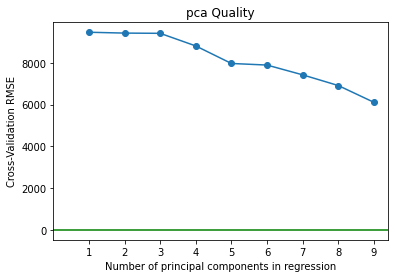

In [105]:
plt.plot(r2_score_list, '-o')
plt.xlabel('Number of principal components in regression')
plt.ylabel('Cross-Validation RMSE')
plt.title('pca Quality')
plt.xlim(xmin=-1);
plt.xticks(np.arange(X_train_pc.shape[1]), np.arange(1, X_train_pc.shape[1]+1))
plt.axhline(y=lr_score_train, color='g', linestyle='-');

In [106]:
best_pc_num = 8
lin_reg_pc = LinearRegression().fit(X_train_pc[:,:best_pc_num], y_train)
lin_reg_pc.score(X_train_pc[:,:best_pc_num], y_train)

0.5877021802602582

In [107]:
best_pc_num = 7
lin_reg_pc = LinearRegression().fit(X_train_pc[:,:best_pc_num], y_train)
lin_reg_pc.score(X_train_pc[:,:best_pc_num], y_train)

0.5468211641059293